In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
initial_value = 200_000
interest_rate = 18
time_year = 5

In [3]:
#

C = initial_value
N = time_year
I = interest_rate / 100

sum_int = 0

# C = S ( ( 1 - (1 + i) ** -n ) / i )

# S = C * i ( 1 - (1 + i) ** - n)

S = C * I / (1 - (1 + I) ** -N)

S

63955.568358957375

In [4]:
df = pd.DataFrame(dtype=np.float64)
df['Loan'] = [0] * (time_year + 1)
df


,Loan
0,0
1,0
2,0
3,0
4,0
5,0


In [5]:
for i in range (time_year + 1):
    sum_int += (interest_rate / 100) * initial_value
    initial_value *= ( 1 + (interest_rate / 100) )
    df.loc[df.index[i], 'Loan'] = initial_value
    print(initial_value)
    initial_value -= S

236000.0
203012.4293364303
164087.09595341803
118155.20256146356
63955.5683589573
-8.585629984736442e-11


C:\Users\HP Victus 16\AppData\Local\Temp\ipykernel_36124\1003314484.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '203012.4293364303' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df.index[i], 'Loan'] = initial_value


In [6]:
print(sum_int)

119777.84179478681


In [7]:
pd.options.display.float_format = '{:.5f}'.format
df

,Loan
0,236000.00000
1,203012.42934
2,164087.09595
3,118155.20256
4,63955.56836
5,-0.00000


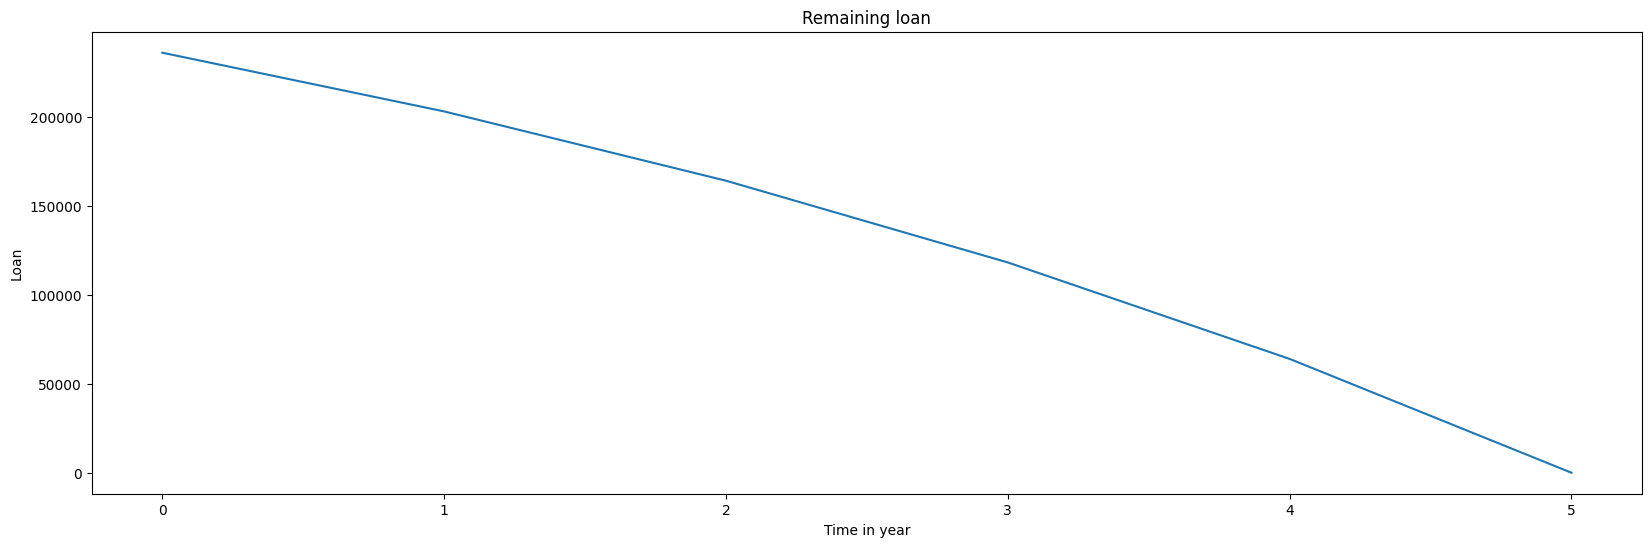

In [8]:
plt.figure(figsize=(20,6))

plt.plot(df['Loan'])
plt.title("Remaining loan")
plt.ylabel("Loan")
plt.xlabel("Time in year")
plt.show()


Binary search approach

In [9]:

l = 0
r = 2 ** 31 - 1
res = 0

while (l <= r):
    
    m = l + (r - l) // 2 

    iv = 200_000
    ir = 18
    ty = 5
    
    for i in range (ty):
        iv = iv * (1 + (ir / 100))
        iv -= m
        
    if (iv > 10):
        l = m + 1
    
    elif (iv < -10):
        r = m - 1
    
    else:
        res = m
        l = r
        
print(res)    

63955


In [10]:
base_payment = res * 1.000
left = base_payment
right = base_payment + 1
final_res = 0

while right - left > 0.00001:
    mid = (left + right) / 2
    print(mid)
    final_res=mid
    iv = 200_000
    ir = 18
    ty = 5

    for i in range(ty):
        iv = iv * (1 + (ir / 100.0))
        iv -= mid

    if iv > 0.000001:
        left = mid
    elif iv < 0.000001:
        right = mid
    else:
        final_res = mid
        left = right

print(f"Approximate annual payment : {final_res:.10f}")

63955.5
63955.75
63955.625
63955.5625
63955.59375
63955.578125
63955.5703125
63955.56640625
63955.568359375
63955.5673828125
63955.56787109375
63955.568115234375
63955.56823730469
63955.568298339844
63955.56832885742
63955.56834411621
63955.568351745605
Approximate annual payment : 63955.5683517456
